# Gas Ratio Analysis

In [1]:
import os, sys
# All necessary methods are in the following utility module
sys.path.append('../src')
%matplotlib inline
import multigas_analysis_tools as multools

# NOW we need the path to your data
#inputfiledir = 'C:\Users\Manu\workspace\PyGas\datas'
inputfiledir = '/home/manu/workspace/PyGas/datas'
csvname = 'Sabancaya_For_Python-Script.csv'
filepath = os.path.join(inputfiledir, csvname)

# Thus function will read the csv and return a pandas DataFrame object
raw_data = multools.get_raw_data(filepath)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6600 entries, 2016-04-19 13:00:30 to 2016-04-19 14:50:29
Data columns (total 9 columns):
Unnamed: 0    6600 non-null datetime64[ns]
H2            6600 non-null float64
SO2           6600 non-null float64
H2S           6600 non-null float64
H2O           6600 non-null float64
Tair          6600 non-null float64
CO2           6600 non-null float64
HCl           6600 non-null float64
P             6600 non-null float64
dtypes: datetime64[ns](1), float64(8)
memory usage: 515.6 KB


/home/manu/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


Atmospheric CO2 evaluated at 600.4 ppm


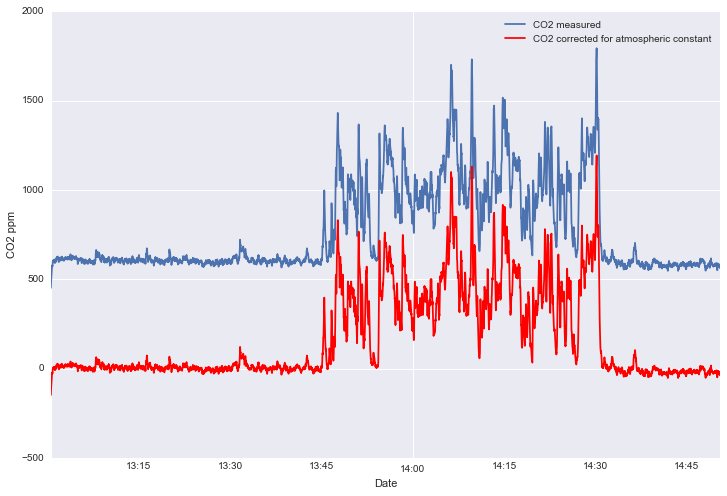

In [2]:
# Now let's manipulate the data a little
# Select a Pair of gas
gas_ref = 'SO2' # SO2 is the reference
gas_tar = 'CO2' # CO2 is the target: we will be interested in the CO2/SO2 ratio

# First we correct the gas value for atmospheric constant
corrected_data = multools.correct_for_atmo(raw_data, gas_tar, gas_ref,
                                           plot_result=True)

In [3]:
# Now limit the analysis to points where the reference gas is actually measured
resized_data = multools.limit_to_active_points(corrected_data,
                                               minimum_value=5)
# ALTERNATE METHOD IF YOU KNOW BOUNDARIES OR WANT To Set by hand:
#Tstart=500;Tstop=2500
#resized_data = corrected_data[2694:5770]

ratio CO2 / SO2 is 1.40 in linreg
ratio CO2 / SO2 is 2.65 in average
ratio CO2 / SO2 is 2.15 in median


/home/manu/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


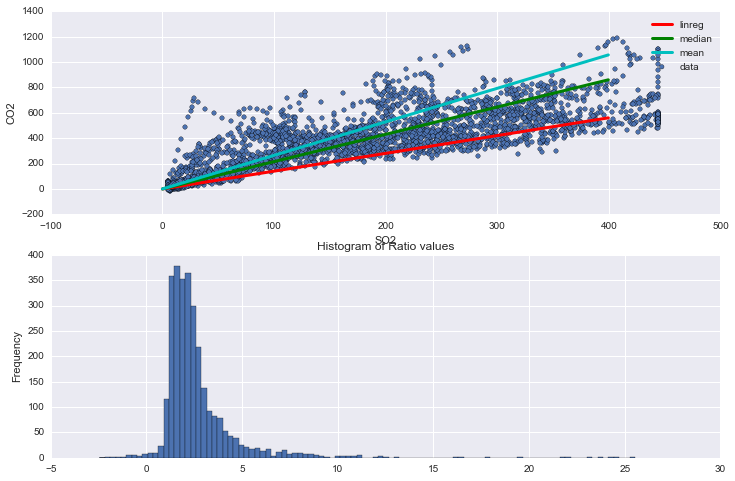

In [4]:
# Now start real work: estimate slope and build the scatter plot
# to visually validate the model
linreg, median_value, mean_value = multools.estimate_slope(resized_data, gas_tar, gas_ref,
                                     plot_scatter=True)

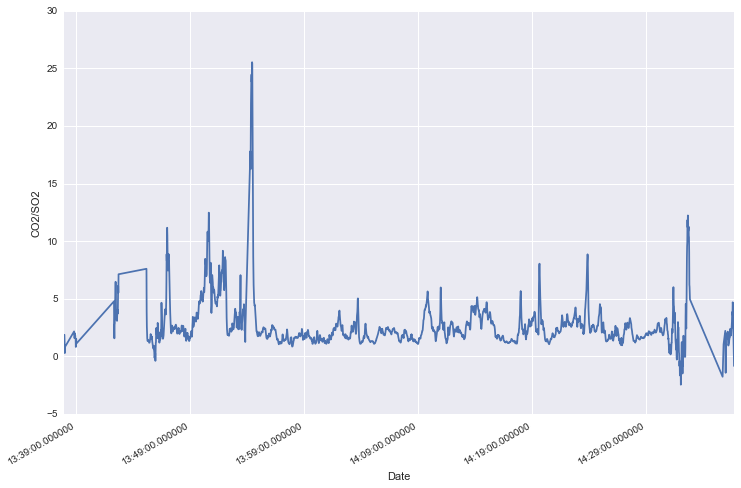

In [5]:
# Now plot the evolution of the ratio 
data_with_ratio = multools.add_ratio(resized_data, gas_tar, gas_ref,
                                       plot_result=True)

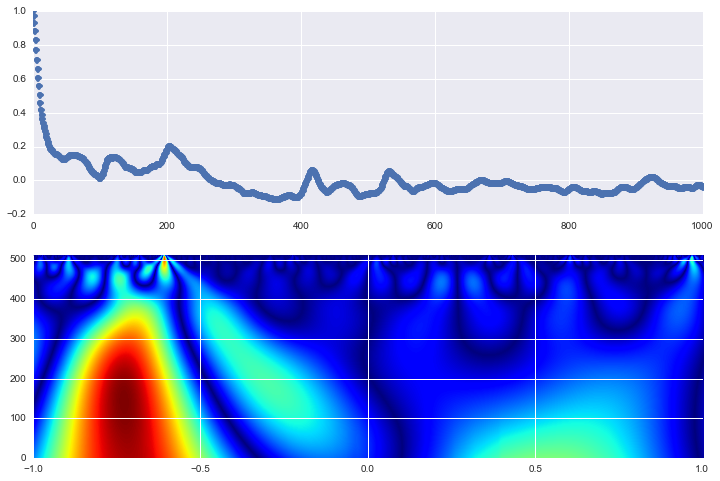

In [6]:
# Finally perform harmonic analysis to find periodicity
multools.harmo_analysis(data_with_ratio, gas_tar, gas_ref)